## 1. Problem Statement

###  *How can we leverage AI-driven solutions to accurately forecast resale flat prices in Singapore's public housing market, incorportating the impact of nearby amenities to address the need for precision amidst market fluctuations?*

## 2. Data Acquisition

The main source of data, which is our base data was obtained from "https://beta.data.gov.sg/" and Kaggle. The open source government website is Singapore's open data collective that allows users to explore national datasets, download raw data for research analysis and access web APIs for web development.

We obtained our primary dataset from Kaggle labelled as "Singapore Public Housing Resale Flat Prices, which contains 155,822 rows of HDB flats transactions from Year 2017 to 2023. However, the information provided in this dataset were insufficient as only flat data such as its size, model and location was shown. 

Therefore, we decided to use additional datasets as seen below, in the form of csv files to aid us in predicting accurately for this project. 
 
* HDB Property Information - Contains information on resale flat prices and also has features like 'Maximum floor level'.

* Government Hawker Centres - Contains information about hawker centres, shows accessibility to afforable food.

* MRT Stations - Contains information on MRT stations, shows accessibility to transport.

* Primary Schools - Contains information on Primary schools, measure of accessibility to early education depending on proximity to primary school. 

* Shopping Malls - Contains information on Shopping malls, shows accessbility to leisure. 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# load dataset
df_final = pd.read_csv('final_merged_dataset.csv')


# print data types of variables
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155821 entries, 0 to 155820
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     155821 non-null  int64  
 1   Town                      155821 non-null  object 
 2   FlatType                  155821 non-null  object 
 3   Block                     155821 non-null  object 
 4   Street                    155821 non-null  object 
 5   StoreyRange               155821 non-null  object 
 6   FloorAreaSqm              155821 non-null  float64
 7   FlatModel                 155821 non-null  object 
 8   LeaseCommenceDate         155821 non-null  int64  
 9   RemainingLease            155821 non-null  object 
 10  Price                     155821 non-null  float64
 11  Year                      155821 non-null  int64  
 12  Month                     155821 non-null  int64  
 13  Address                   155821 non-null  o

## 3. Data Exploration - Exploratory Data Analysis (EDA)

This stage is a crucial stage in the **AI Project Lifecycle** to *uncover insights* from visualising the dataset. In the next few code blocks, we will be looking at what the dataset contains and visualising the different variables. 

In [3]:
# Display first 5 data rows
df_final.head()

,Index,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,...,MRTDistribution,NearestHawkerCentre,DistanceFromHawkerCentre,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution
0,0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,More than-1km,Blk 409 Ang Mo Kio Ave 10,0.17241064129214373 km,within-1km,Townsville Primary School,0.2181254395256675 km,within-1km,AMK Hub,1.003018118556015 km,More than-1km
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,More than-1km,Blk 724 Ang Mo Kio Ave 6,0.9341909181314921 km,within-1km,Ang Mo Kio Primary School,0.2415753425097763 km,within-1km,Broadway Plaza,0.868861431290418 km,within-1km
2,2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,More than-1km,Sembawang Hill Food Centre,1.166164248332101 km,More than-1km,Anderson Primary School,0.7771571662417865 km,within-1km,Broadway Plaza,1.5255730377820635 km,More than-1km
3,3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,within-1km,Blk 409 Ang Mo Kio Ave 10,0.4462404690664215 km,within-1km,Teck Ghee Primary School,0.6981684698310231 km,within-1km,myVillage At Serangoon Garden,0.8937956343800417 km,within-1km
4,4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,More than-1km,Sembawang Hill Food Centre,1.1802560030151612 km,More than-1km,Anderson Primary School,0.7825550706448622 km,within-1km,Broadway Plaza,1.5693068531867669 km,More than-1km


In [4]:
# Display summary statistics
print(df_final.describe())

               Index   FloorAreaSqm  LeaseCommenceDate         Price  \
count  155821.000000  155821.000000      155821.000000  1.558210e+05   
mean    77910.000000      97.477862        1995.668087  4.835541e+05   
std     44981.792485      24.046407          13.823952  1.671764e+05   
min         0.000000      31.000000        1966.000000  1.400000e+05   
25%     38955.000000      82.000000        1985.000000  3.600000e+05   
50%     77910.000000      94.000000        1996.000000  4.515000e+05   
75%    116865.000000     113.000000        2008.000000  5.750000e+05   
max    155820.000000     249.000000        2019.000000  1.500000e+06   

                Year          Month       Latitude      Longitude  \
count  155821.000000  155821.000000  155492.000000  155492.000000   
mean     2019.954865       6.484851       1.367908     103.841995   
std         1.862432       3.405119       0.042783       0.071007   
min      2017.000000       1.000000       1.270380     103.685228   
25%   

In [5]:
# Check for missing values
print(df_final.isnull().sum())

Index                         0
Town                          0
FlatType                      0
Block                         0
Street                        0
StoreyRange                   0
FloorAreaSqm                  0
FlatModel                     0
LeaseCommenceDate             0
RemainingLease                0
Price                         0
Year                          0
Month                         0
Address                       0
Latitude                    329
Longitude                   329
Postal                      329
MaxFloorLevel                 0
YearCompleted                 0
MarketHawker                  0
MultistoreyCarpark            0
TotalDwellingUnits            0
RemainingLeaseINT             0
StoreyRangeINT                0
NearestMRT                  329
DistanceFromMRT             329
MRTDistribution             329
NearestHawkerCentre         329
DistanceFromHawkerCentre    329
HawkerCentreDistribution    329
NearestSchool               329
Distance

In [5]:
# drop all missing values 
df_final.dropna(inplace=True)
print(df_final.isnull().sum())

Index                       0
Town                        0
FlatType                    0
Block                       0
Street                      0
StoreyRange                 0
FloorAreaSqm                0
FlatModel                   0
LeaseCommenceDate           0
RemainingLease              0
Price                       0
Year                        0
Month                       0
Address                     0
Latitude                    0
Longitude                   0
Postal                      0
MaxFloorLevel               0
YearCompleted               0
MarketHawker                0
MultistoreyCarpark          0
TotalDwellingUnits          0
RemainingLeaseINT           0
StoreyRangeINT              0
NearestMRT                  0
DistanceFromMRT             0
MRTDistribution             0
NearestHawkerCentre         0
DistanceFromHawkerCentre    0
HawkerCentreDistribution    0
NearestSchool               0
DistanceFromSchool          0
SchoolDistribution          0
NearestSho

In [6]:
#convert Remaining Lease to Decimal
# Extract years and months from RemainingLease
df_final['years_remaining'] = df_final['RemainingLease'].str.extract('(\d+) years').astype(float)
df_final['months_remaining'] = df_final['RemainingLease'].str.extract('(\d+) months').astype(float)

# Convert years and months to decimal
df_final['months_remaining'].fillna(0, inplace=True)
df_final['decimal_remaining_lease'] = df_final['years_remaining'] + df_final['months_remaining'] / 12
print(df_final.head())


   Index        Town FlatType Block             Street StoreyRange  \
0      0  ANG MO KIO   2 ROOM   406  ANG MO KIO AVE 10    10 TO 12   
1      1  ANG MO KIO   3 ROOM   108   ANG MO KIO AVE 4    01 TO 03   
2      2  ANG MO KIO   3 ROOM   602   ANG MO KIO AVE 5    01 TO 03   
3      3  ANG MO KIO   3 ROOM   465  ANG MO KIO AVE 10    04 TO 06   
4      4  ANG MO KIO   3 ROOM   601   ANG MO KIO AVE 5    01 TO 03   

   FloorAreaSqm       FlatModel  LeaseCommenceDate      RemainingLease  ...  \
0          44.0        Improved               1979  61 years 04 months  ...   
1          67.0  New Generation               1978  60 years 07 months  ...   
2          67.0  New Generation               1980  62 years 05 months  ...   
3          68.0  New Generation               1980   62 years 01 month  ...   
4          67.0  New Generation               1980  62 years 05 months  ...   

   HawkerCentreDistribution              NearestSchool     DistanceFromSchool  \
0                within

### Univariate Analysis - Exploration of variables one by one

- Visualisation of Categorical variables - understand the distribution of each variable.
- Visualisation of Continuous variables - understand the central tendency and spread of the variable.

                  Price
FlatType               
1 ROOM               61
2 ROOM             2484
3 ROOM            36486
4 ROOM            65259
5 ROOM            39222
EXECUTIVE         11908
MULTI-GENERATION     72


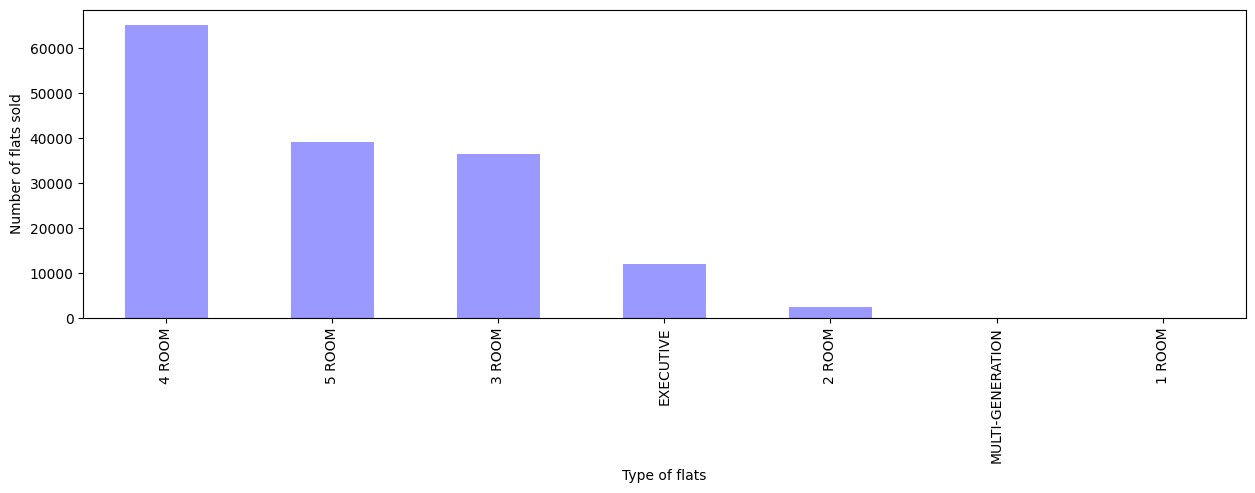

In [35]:
# View counts of different flat types sold
# Results: lack of transaction activities for flat type - "1 ROOM", "2 ROOMS" and "Multi-Generation" flat types.
print(df_final.pivot_table(values='Price', index='FlatType',aggfunc=pd.Series.count))

group_df = df_final.groupby('FlatType')['FlatType'].agg('count')
fig, axes = plt.subplots(figsize=(15, 4))
group_df.sort_values(ascending=False).plot(kind='bar', color='b', alpha=0.4)

plt.ylabel('Number of flats sold')
plt.xlabel('Type of flats')
plt.show()

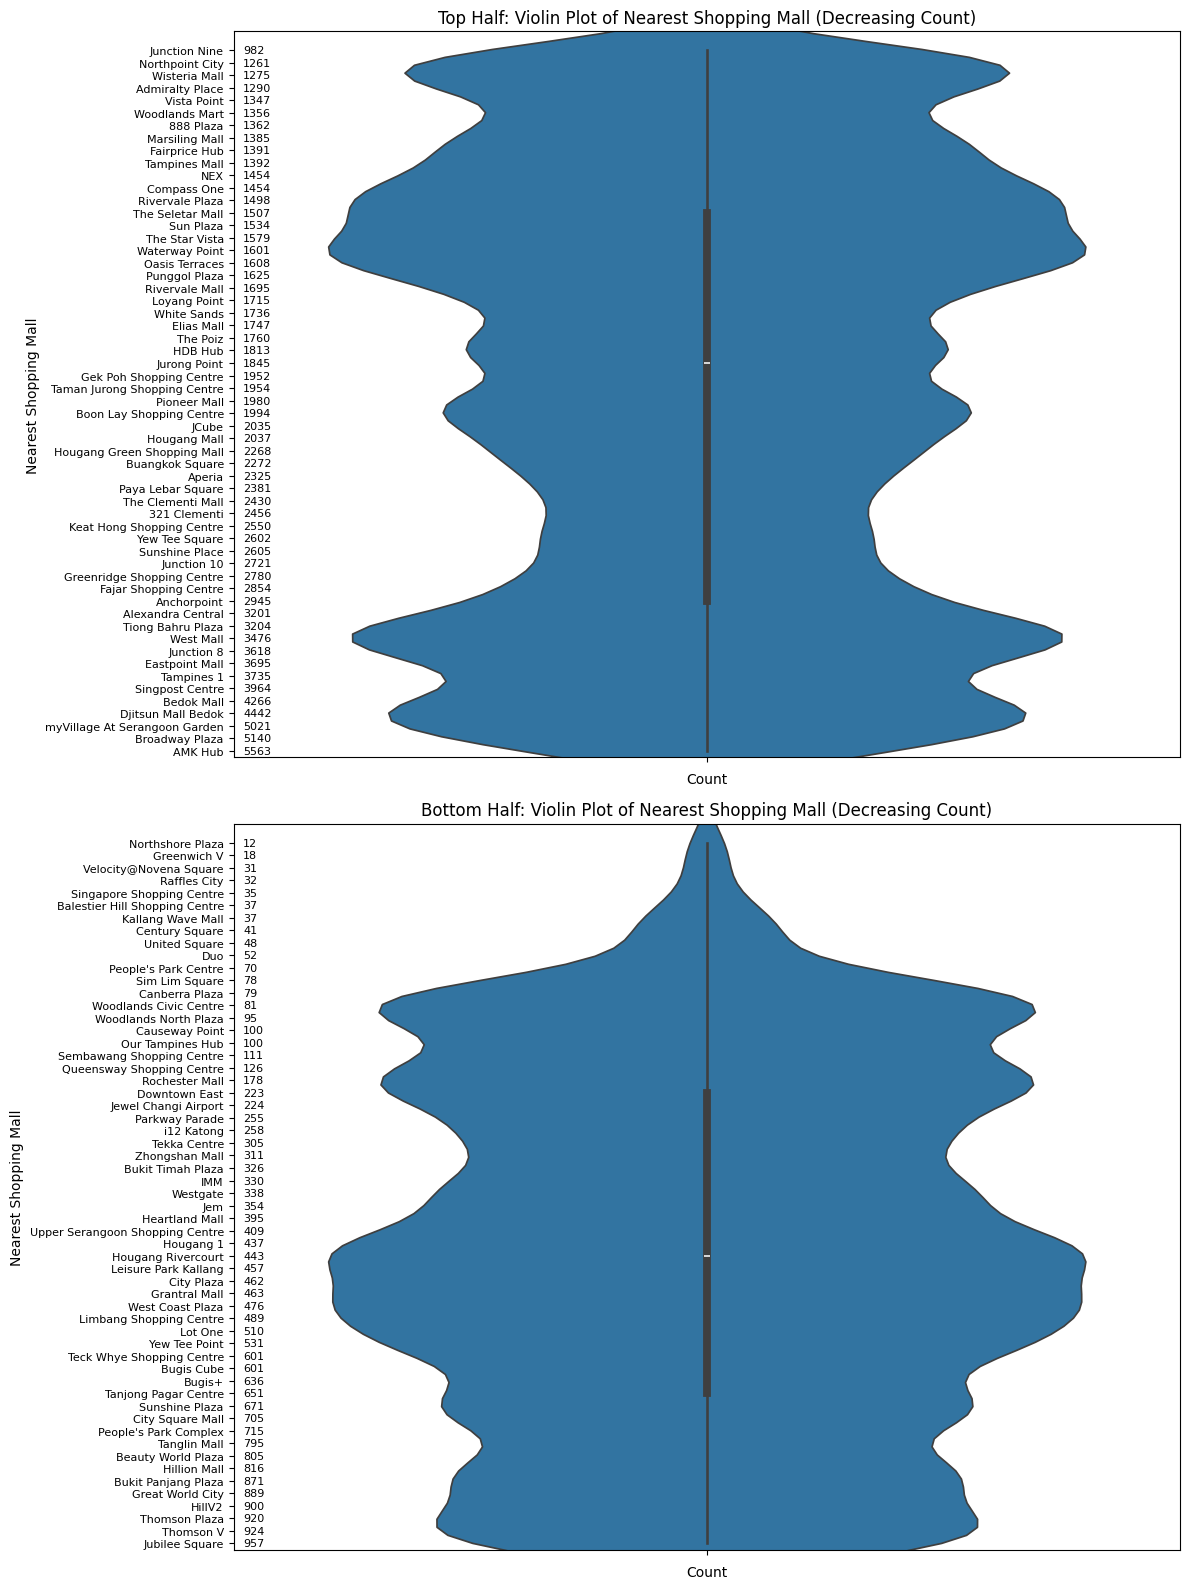

In [36]:
# Violin plot for Nearest Shopping Mall - Categorical variable
# A violin plot displays the distribution of data across categories using the width to represent density 
# Kernel density estimate to show the overall shape
# White dot/mark represents the median of the data
# Rectangle/Box represents the Interquartile Range (IQR) - 25th percentile to the 75th percentile
# Whiskers represents range of the data beyond the IQR (excluding outliers)


sorted_counts = df_final['NearestShoppingMall'].value_counts().sort_values(ascending=False)

# Split the sorted data into two halves for better readability
half_point = len(sorted_counts) // 2
top_half = sorted_counts[:half_point]
bottom_half = sorted_counts[half_point:]

# Create two separate plots to prevent axes label overlapping
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot top half
sns.violinplot(y=df_final[df_final['NearestShoppingMall'].isin(top_half.index)]['NearestShoppingMall'], ax=axes[0])
axes[0].set_title('Top Half: Violin Plot of Nearest Shopping Mall (Decreasing Count)')
axes[0].set_ylabel('Nearest Shopping Mall')
axes[0].set_xlabel('Count')
axes[0].tick_params(axis='y', labelsize=8)  
axes[0].set_ylim(-0.5, len(top_half) + 0.5)  

# Add annotations for count on violins
for i, (mall, count) in enumerate(top_half.items()):
    axes[0].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8) 

# Plot bottom half
sns.violinplot(y=df_final[df_final['NearestShoppingMall'].isin(bottom_half.index)]['NearestShoppingMall'], ax=axes[1])
axes[1].set_title('Bottom Half: Violin Plot of Nearest Shopping Mall (Decreasing Count)')
axes[1].set_ylabel('Nearest Shopping Mall')
axes[1].set_xlabel('Count')
axes[1].tick_params(axis='y', labelsize=8) 
axes[1].set_ylim(-0.5, len(bottom_half) + 0.5)  

# Add annotations for count on violins
for i, (mall, count) in enumerate(bottom_half.items()):
    axes[1].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8)  

plt.tight_layout()
plt.show()

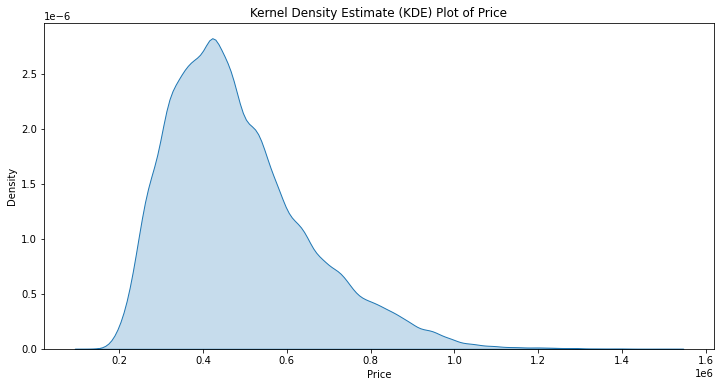

In [32]:


# Create a KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df_final['Price'], fill=True)

# Set plot title and labels
plt.title('Kernel Density Estimate (KDE) Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Show the plot
plt.show()


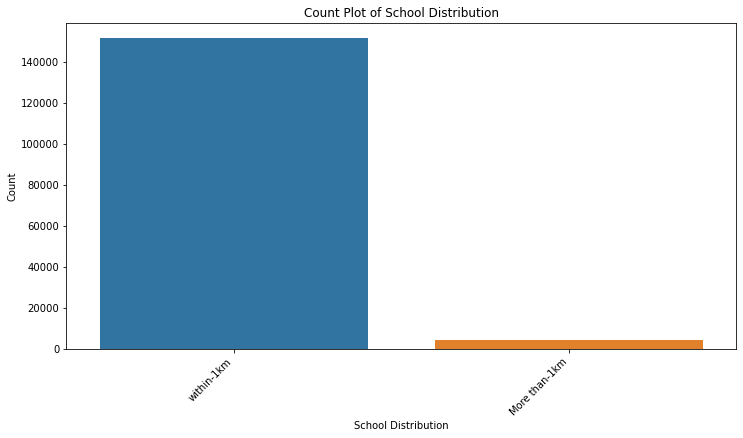

In [34]:

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='SchoolDistribution', data=df_final, order=df_final['SchoolDistribution'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Count Plot of School Distribution')
plt.xlabel('School Distribution')
plt.ylabel('Count')

# Show the plot
plt.show()

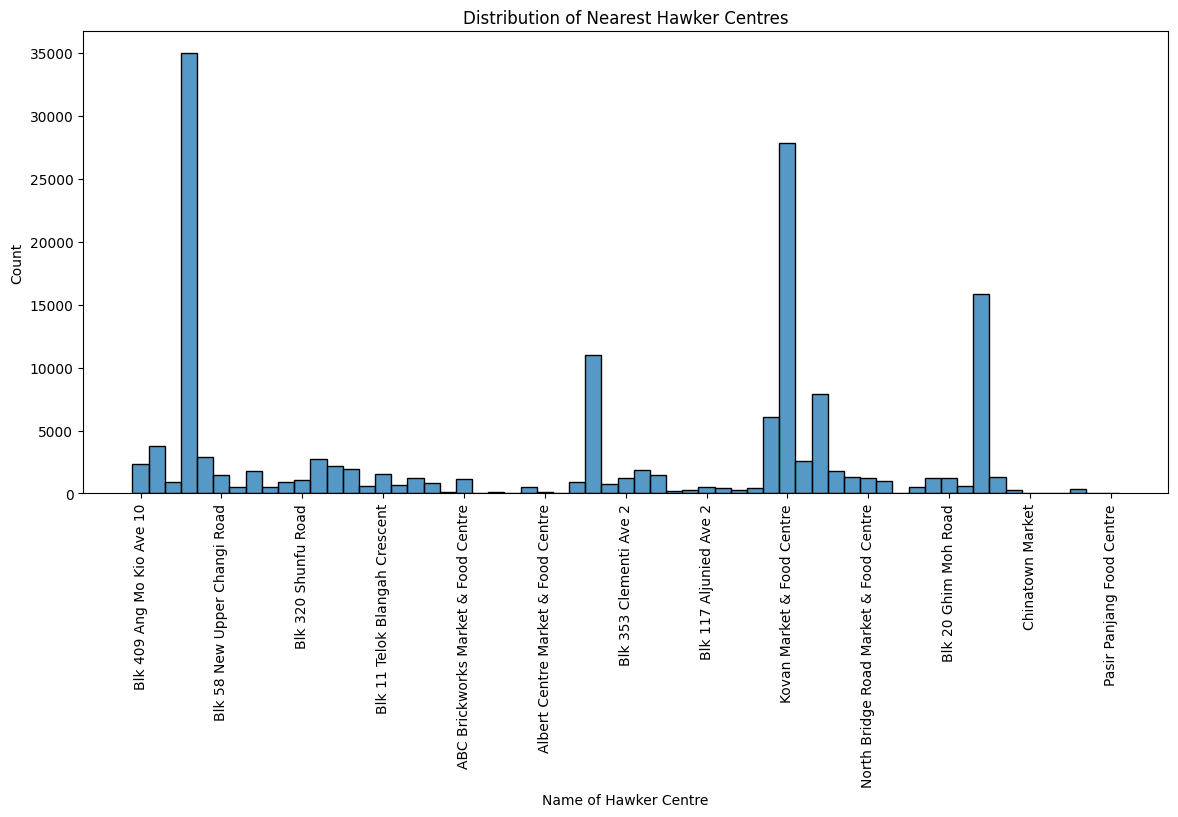

In [37]:
# Histogram for Nearest Hawker Centre - Categorical variable :


step_size = 5  

# Plot histogram
plt.figure(figsize=(14, 6))

sns.histplot(df_final['NearestHawkerCentre'], bins=len(df_final['NearestHawkerCentre'].unique()), kde=False)

plt.title('Distribution of Nearest Hawker Centres')
plt.xlabel('Name of Hawker Centre')
plt.ylabel('Count')

plt.xticks(rotation=90, ticks=np.arange(0, len(df_final['NearestHawkerCentre'].unique()), step_size))  # Spread out x-axis ticks
plt.show()

In [9]:
# Pie Chart for Nearest MRT Station - Categorical variable :

region_to_mrt = {
    'ANG MO KIO': ['ANG MO KIO MRT STATION'],
    'BEDOK': ['BEDOK MRT STATION', 'BEDOK RESERVOIR MRT STATION', 'BEDOK NORTH MRT STATION', 'UBI MRT STATION'],
    'BISHAN': ['MARYMOUNT MRT STATION', 'BISHAN MRT STATION', 'LORONG CHUAN MRT STATION', 'BRADDELL MRT STATION'],
    'BUKIT BATOK': ['BUKIT BATOK MRT STATION', 'BUKIT GOMBAK MRT STATION'],
    'BUKIT MERAH': ['REDHILL MRT STATION', 'TIONG BAHRU MRT STATION', 'LABRADOR PARK MRT STATION', 'OUTRAM PARK MRT STATION', 'HARBOURFRONT MRT STATION'],
    'BUKIT PANJANG': ['BUKIT PANJANG MRT STATION', 'PETIR MRT STATION', 'FAJAR LRT STATION', 'PHOENIX LRT STATION', 'JELAPANG LRT STATION', 'SEGAR LRT STATION', 'PENDING LRT STATION', 'PETIR LRT STATION', 'FERNVALE LRT STATION', 'SOO TECK LRT STATION', 'POTONG PASIR MRT STATION', 'BUKIT PANJANG LRT STATION'],
    'BUKIT TIMAH': ['BEAUTY WORLD MRT STATION', 'KING ALBERT PARK MRT STATION'],
    'CENTRAL AREA': ['MARINA BAY MRT STATION', 'RAFFLES PLACE MRT STATION', 'CITY HALL MRT STATION', 'TANJONG PAGAR MRT STATION', 'ROCHOR MRT STATION', 'FARRER PARK MRT STATION', 'BRAS BASAH MRT STATION', 'CHINATOWN MRT STATION', 'BENCOOLEN MRT STATION', 'JALAN BESAR MRT STATION'],
    'CHOA CHU KANG': ['CHOA CHU KANG MRT STATION', 'SOUTH VIEW MRT STATION', 'KEAT HONG LRT STATION', 'TECK WHYE LRT STATION', 'KUPANG LRT STATION', 'CHOA CHU KANG LRT STATION'],
    'CLEMENTI': ['CLEMENTI MRT STATION'],
    'GEYLANG': ['ALJUNIED MRT STATION', 'PAYA LEBAR MRT STATION', 'DAKOTA MRT STATION', 'KALLANG MRT STATION', 'MACPHERSON MRT STATION', 'EUNOS MRT STATION', 'BUGIS MRT STATION'],
    'HOUGANG': ['HOUGANG MRT STATION', 'KOVAN MRT STATION', 'BUANGKOK MRT STATION', 'SENGKANG LRT STATION'],
    'JURONG': ['BOON LAY MRT STATION', 'PIONEER MRT STATION', 'JOO KOON MRT STATION','CHINESE GARDEN MRT STATION', 'JURONG EAST MRT STATION'],
    'KALLANG': ['LAVENDER MRT STATION', 'STADIUM MRT STATION', 'GEYLANG BAHRU MRT STATION', 'MOUNTBATTEN MRT STATION', 'ALJUNIED MRT STATION', 'KALLANG MRT STATION'],
    'MARINE PARADE': ['TANJONG KATONG MRT STATION', 'MARINE PARADE MRT STATION'],
    'PASIR RIS': ['PASIR RIS MRT STATION'],
    'PUNGGOL': ['PUNGGOL MRT STATION', 'SOO TECK MRT STATION', 'PUNGGOL LRT STATION', 'OASIS LRT STATION', 'COVE LRT STATION', 'SUMANG LRT STATION', 'DAMAI LRT STATION'],
    'QUEENSTOWN': ['QUEENSTOWN MRT STATION', 'COMMONWEALTH MRT STATION', 'ONE-NORTH MRT STATION', 'BUONA VISTA MRT STATION', 'HOLLAND VILLAGE MRT STATION'],
    'SEMBAWANG': ['SEMBAWANG MRT STATION', 'CANBERRA MRT STATION'],
    'SENKANG': ['SENGKANG MRT STATION', 'BUANGKOK MRT STATION', 'COMPASSVALE LRT STATION', 'RIVIERA LRT STATION', 'CHENG LIM LRT STATION', 'TONGKANG LRT STATION', 'RANGGUNG LRT STATION', 'THANGGAM LRT STATION', 'KANGKAR LRT STATION', 'LAYAR LRT STATION', 'SENGKANG LRT STATION', 'ANCHORVALE LRT STATION'],
    'SERANGOON': ['SERANGOON MRT STATION', 'BARTLEY MRT STATION', 'TAI SENG MRT STATION'],
    'TAMPINES': ['TAMPINES MRT STATION', 'TAMPINES EAST MRT STATION', 'TAMPINES WEST MRT STATION', 'TANAH MERAH MRT STATION', 'SIMEI MRT STATION'],
    'TOA PAYOH': ['TOA PAYOH MRT STATION', 'CALDECOTT MRT STATION', 'NOVENA MRT STATION'],
    'WOODLANDS': ['WOODLANDS MRT STATION', 'MARSILING MRT STATION', 'ADMIRALTY MRT STATION', 'WOODLANDS NORTH MRT STATION', 'WOODLANDS SOUTH MRT STATION'],
    'YISHUN': ['YISHUN MRT STATION', 'KHATIB MRT STATION']
}


# List of all MRT stations
all_mrt_stations = set(df_final['NearestMRT'].unique())

# List of stations included in the dictionary
included_stations = set(station for stations in region_to_mrt.values() for station in stations)

# Stations not included in the dictionary
stations_not_included = all_mrt_stations - included_stations

print("Stations not included in the dictionary:")
print(stations_not_included)


Stations not included in the dictionary:
{'BENDEMEER MRT STATION', 'SEGAR LRT STATION', 'CHANGI AIRPORT MRT STATION', 'CHOA CHU KANG LRT STATION', 'KAKI BUKIT MRT STATION', 'HILLVIEW MRT STATION', 'CORAL EDGE LRT STATION', 'KADALOOR LRT STATION', 'TELOK BLANGAH MRT STATION', 'BENCOOLEN MRT STATION', 'JALAN BESAR MRT STATION', 'YEW TEE MRT STATION', 'WOODLEIGH MRT STATION', 'BANGKIT LRT STATION', 'DOVER MRT STATION', 'TEN MILE JUNCTION LRT STATION', 'MERIDIAN LRT STATION', 'FARMWAY LRT STATION', 'LITTLE INDIA MRT STATION', 'FARRER ROAD MRT STATION', 'SOUTH VIEW LRT STATION', 'NIBONG LRT STATION', 'MATTAR MRT STATION', 'EUNOS MRT STATION', 'LAKESIDE MRT STATION', 'RUMBIA LRT STATION', 'PETIR LRT STATION', 'BUGIS MRT STATION', 'PENDING LRT STATION', 'BOON KENG MRT STATION', 'YIO CHU KANG MRT STATION', 'SENJA LRT STATION', 'FERNVALE LRT STATION', 'SOO TECK LRT STATION', 'POTONG PASIR MRT STATION', 'BUKIT PANJANG LRT STATION', 'ESPLANADE MRT STATION', 'RENJONG LRT STATION', 'UPPER CHANGI MR

In [ ]:

# Get the count of each unique nearest MRT Station
mrt_counts = df_final['NearestMRT'].value_counts()

# Sum the counts of MRT stations with less than 1% occurrence
small_counts = mrt_counts[mrt_counts / len(df_final) < 0.01].sum()

# Create a new series with the lumped category
mrt_counts_lumped = mrt_counts[mrt_counts / len(df_final) >= 0.01]
mrt_counts_lumped['Other stations with less than 1% occurance'] = small_counts

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(mrt_counts_lumped, labels=mrt_counts_lumped.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Nearest MRT Stations')

plt.show()


### Bivariate Analysis - Exploration of relationship between two variables

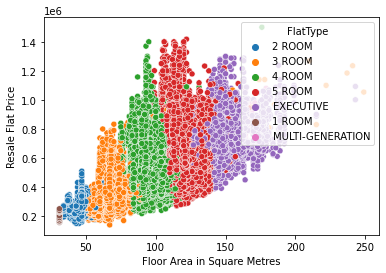

In [40]:
# Scatter Plot to visualise the relationship between the floor area ('FloorAreaSqm') and resale flat prices ('Price')
sns.scatterplot(data=df_final,x='FloorAreaSqm',y='Price', hue='FlatType')
plt.ylabel('Resale Flat Price')
plt.xlabel('Floor Area in Square Metres')
plt.show()

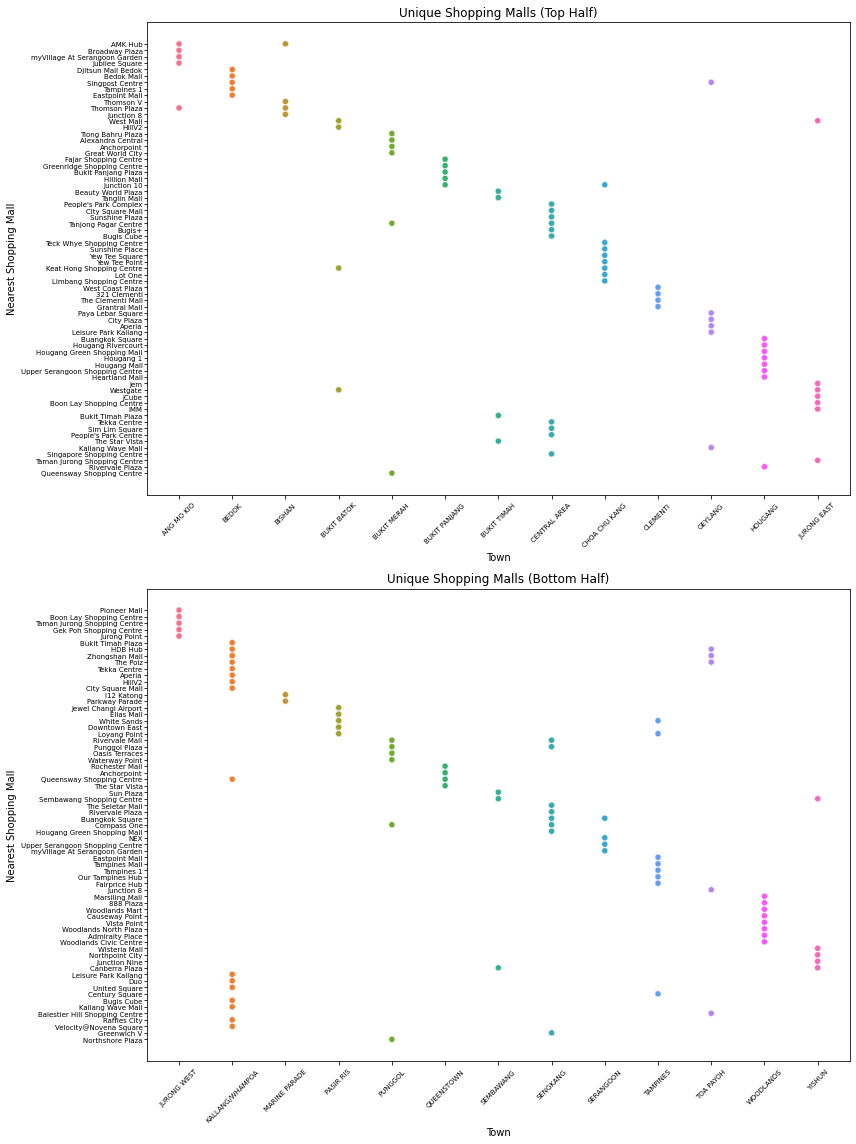

In [41]:
# Scatter plot is used to visualize the distribution of unique shopping malls for each town, 
# with towns represented on the x-axis and shopping malls represented on the y-axis.

df_final['NearestShoppingMall'] = df_final['NearestShoppingMall'].astype(str)

# Get unique shopping malls for each town
unique_shopping_malls = df_final.groupby('Town')['NearestShoppingMall'].unique()

# Split unique shopping malls into two halves for better readability
half_point = len(unique_shopping_malls) // 2
top_half = unique_shopping_malls.iloc[:half_point]
bottom_half = unique_shopping_malls.iloc[half_point:]

# Create two separate plots to prevent axes label overlapping
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot top half
sns.scatterplot(data=df_final[df_final['Town'].isin(top_half.index)], x='Town', y='NearestShoppingMall', ax=axes[0], hue='Town', legend=False)
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Nearest Shopping Mall')
axes[0].set_title('Unique Shopping Malls (Top Half)')
axes[0].tick_params(axis='x', rotation=45) 
axes[0].tick_params(axis='x', labelsize=7) 
axes[0].tick_params(axis='y', labelsize=7, pad=1)  

# Plot bottom half
sns.scatterplot(data=df_final[df_final['Town'].isin(bottom_half.index)], x='Town', y='NearestShoppingMall', ax=axes[1], hue='Town', legend=False)
axes[1].set_xlabel('Town')
axes[1].set_ylabel('Nearest Shopping Mall')
axes[1].set_title('Unique Shopping Malls (Bottom Half)')
axes[1].tick_params(axis='x', rotation=45)  
axes[1].tick_params(axis='x', labelsize=7) 
axes[1].tick_params(axis='y', labelsize=7, pad=1)  

plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()


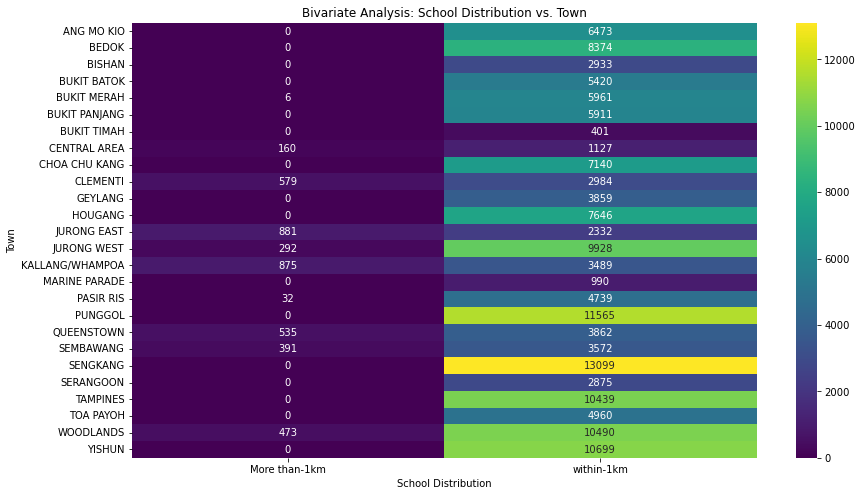

In [42]:

# Create a cross-tabulation of 'SchoolDistribution' and 'Town'
cross_tab = pd.crosstab(df_final['Town'], df_final['SchoolDistribution'])

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')

# Set plot title and labels
plt.title('Bivariate Analysis: School Distribution vs. Town')
plt.xlabel('School Distribution')
plt.ylabel('Town')

# Show the plot
plt.show()

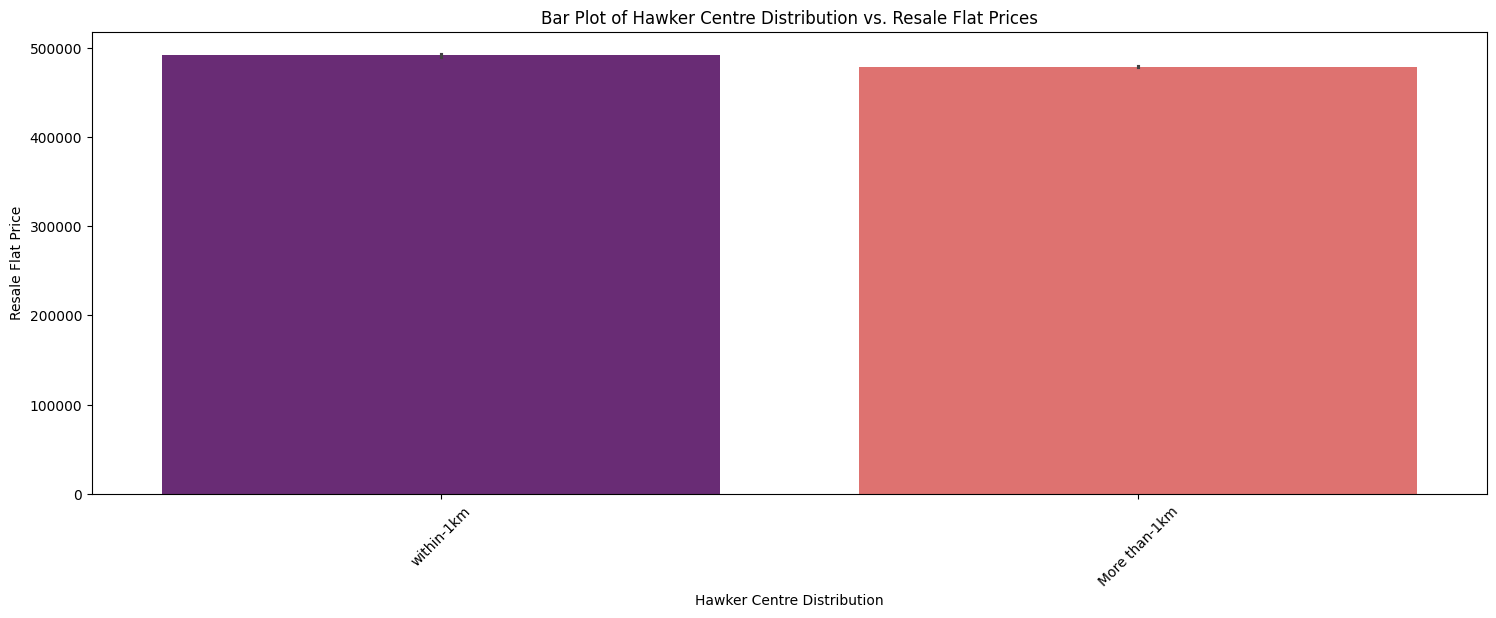

In [38]:
# Bar plot to visualise the relationship between Nearest Hawker Centre Distribution (categorical variable) & Resale flat prices (continous variable) :

plt.figure(figsize=(18, 6)) 

sns.barplot(x='HawkerCentreDistribution', y='Price', data=df_final, palette='magma')
plt.title('Bar Plot of Hawker Centre Distribution vs. Resale Flat Prices')
plt.xlabel('Hawker Centre Distribution')
plt.ylabel('Resale Flat Price')

plt.xticks(rotation=45) 

plt.show()

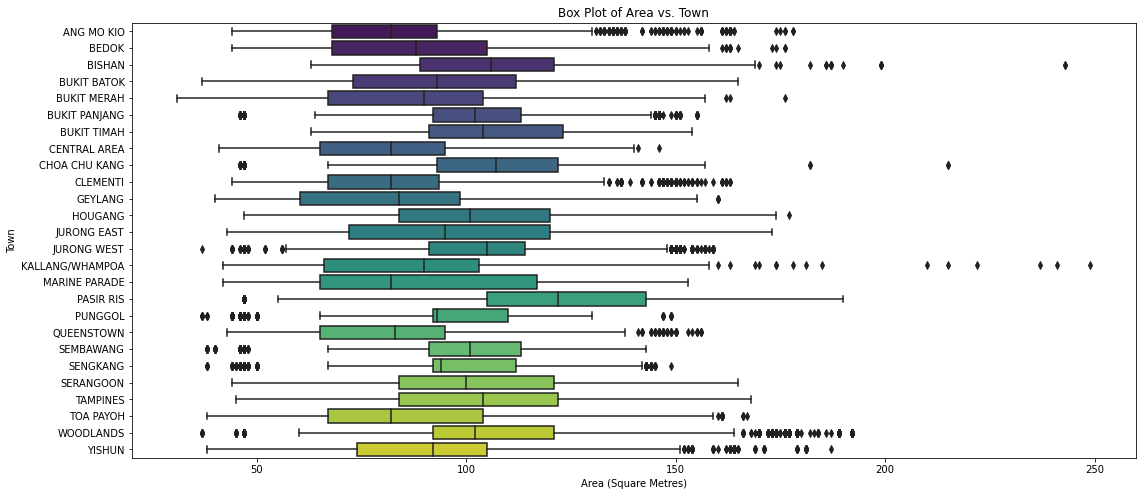

In [25]:
# Box Plot to compare floor area ('FloorAreaSqm') and town ('Town') - one categorical and one continuous variable
# To visualise how the floor areas of properties vary across different towns
plt.figure(figsize=(18, 8))

sns.boxplot(x='FloorAreaSqm', y='Town', data=df_final, palette='viridis')
plt.title('Box Plot of Area vs. Town')
plt.xlabel('Area (Square Metres)')
plt.ylabel('Town')

plt.show()